In [39]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159510,2021-12-08,Pfizer/BioNTech,VDA,50-59,3,3,1,0,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159511,2021-12-08,Pfizer/BioNTech,VDA,60-69,3,3,0,1,0,5,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159512,2021-12-08,Pfizer/BioNTech,VDA,70-79,4,6,0,0,0,10,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste
159513,2021-12-08,Pfizer/BioNTech,VDA,80-89,0,1,0,0,0,1,ITC,ITC2,2,Valle d'Aosta / Vallée d'Aoste


In [40]:
df2 = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df2

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


In [41]:
primadose = df.groupby('area')['prima_dose'].sum().reset_index()
abitantivac = df2.groupby('area')['totale_popolazione'].sum().reset_index()

In [42]:
primadose

,area,prima_dose
0,ABR,991170
1,BAS,428492
2,CAL,1378822
3,CAM,4223716
4,EMR,3472668
5,FVG,901748
6,LAZ,4541686
7,LIG,1185884
8,LOM,7971962
9,MAR,1132704


In [43]:
abitantivac

,area,totale_popolazione
0,ABR,1188922
1,BAS,494881
2,CAL,1689716
3,CAM,5104347
4,EMR,3998406
5,FVG,1088152
6,LAZ,5147533
7,LIG,1399466
8,LOM,9246804
9,MAR,1366477


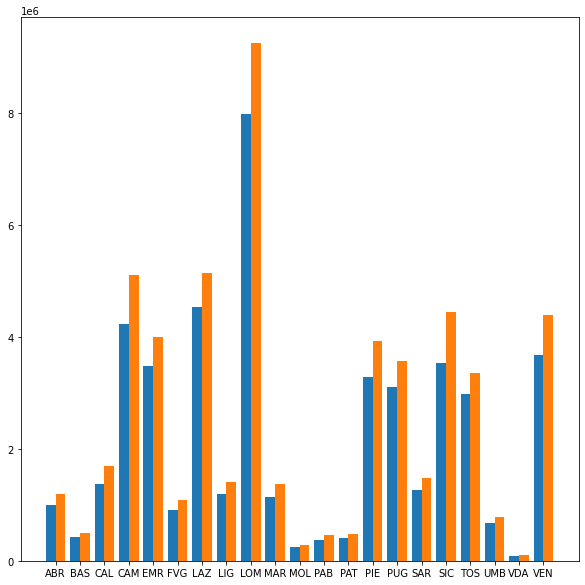

In [44]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.bar(primadose.index-.2,primadose['prima_dose'],width=.4)
ax.bar(abitantivac.index+.2,abitantivac['totale_popolazione'],width=.4)
plt.xticks(abitantivac.index,abitantivac['area'])
plt.show()

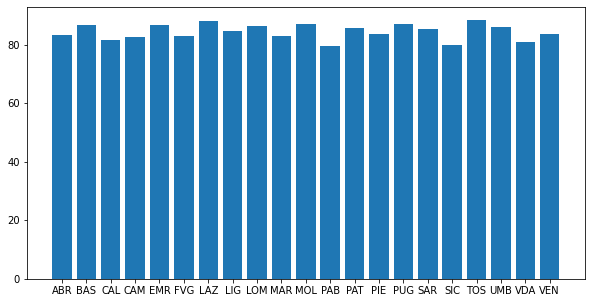

In [45]:
percentuali = primadose['prima_dose']*100/abitantivac['totale_popolazione']

fig = plt.figure(figsize=(10,5))
ax = plt.axes()

ax.bar(abitantivac['area'],percentuali.values)
plt.show()

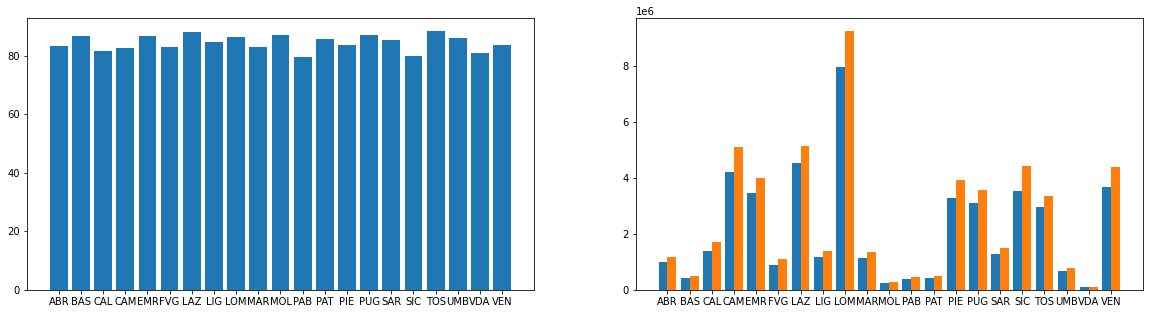

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(20,5)

ax1.bar(abitantivac['area'],percentuali.values)

ax2.bar(primadose.index-.2,primadose['prima_dose'],width=.4)
ax2.bar(abitantivac.index+.2,abitantivac['totale_popolazione'],width=.4)

plt.xticks(abitantivac.index,abitantivac['area'])
plt.savefig('vacciniItalia.png')